In [2]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
# Load the Spotify songs CSV file
spotify = pd.read_csv("spotify_songs.csv")

In [6]:
X = spotify[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = np.ravel(spotify[['playlist_genre']])

featurenames = ['danceability','energy','key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
classnames = spotify['playlist_genre'].unique()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=46)

In [8]:
rfc = RandomForestClassifier(random_state = 46) # Create the random forest model

rfc.fit(X_train, y_train) # Train the model

y_pred = rfc.predict(X_test) # Make predictions with test data

In [10]:
# Calculate accuracy and print results
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5623572407492006


In [12]:
# Code to plot the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

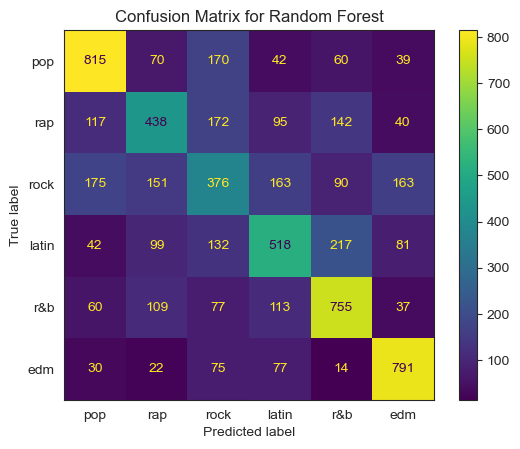

In [14]:
sns.set_style("white") # Set plot style
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classnames)
cm_display.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [16]:
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=classnames)
print(report)

              precision    recall  f1-score   support

         pop       0.66      0.68      0.67      1196
         rap       0.49      0.44      0.46      1004
        rock       0.38      0.34      0.35      1118
       latin       0.51      0.48      0.49      1089
         r&b       0.59      0.66      0.62      1151
         edm       0.69      0.78      0.73      1009

    accuracy                           0.56      6567
   macro avg       0.55      0.56      0.56      6567
weighted avg       0.55      0.56      0.56      6567



In [18]:
# Feature importance
importances = rfc.feature_importances_
importances_df = pd.DataFrame({'Feature': featurenames, 'Importance': importances}).sort_values('Importance', ascending=False) 
print(importances_df.to_string(index=False))

         Feature  Importance
           tempo    0.122061
     speechiness    0.117561
    danceability    0.113041
          energy    0.093309
    acousticness    0.090684
     duration_ms    0.089819
         valence    0.088993
        loudness    0.086063
instrumentalness    0.075463
        liveness    0.065947
             key    0.043951
            mode    0.013108
